In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
from likelihood_calculator import likelihood_analyser

In [4]:
%matplotlib notebook

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
fname = '/home/data_transfer/data_from_windows/20190801/Bead3/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(300,310)]
bdf_x = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data


In [23]:
lc = likelihood_analyser.LikelihoodAnalyser()

In [93]:
fname = '/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(1000,1200)]
bdf_mc1000 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinni

In [94]:
freq = 151
scale = np.mean(bdf_x[1].x2)
x = bdf_x[0].x2/scale*10
x_all = [bdf_.x2/scale*10 for bdf_ in bdf_x]

freq = 151
x_mc_all = [bdf_.x2/scale*10 for bdf_ in bdf_mc1000]

Data overall time:  1.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.282   |   0.014   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


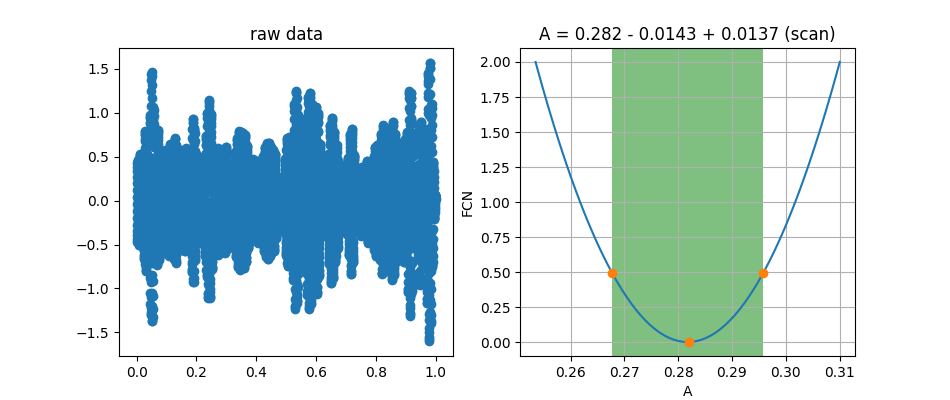

reduced chi2:  0.1860017873969478


In [62]:
# fit arguments
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': np.pi, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True}

m = lc.find_mle_sin(x, drive_freq=freq, bandwidth=50, plot=True, **fit_kwargs)

In [91]:
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': np.pi, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True}
m = [lc.find_mle_sin(x_, drive_freq=freq-2, bandwidth=50, plot=False, **fit_kwargs) for x_ in x_all]

freq = 151-2
fit_kwargs = {'A': 1, 'f': freq, 'phi': np.pi, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True}
m_noise = [lc.find_mle_sin(x_, drive_freq=freq-2, bandwidth=50, plot=False, **fit_kwargs) for x_ in x_all]

freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': np.pi, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True}
m_mc = [lc.find_mle_sin(x_, drive_freq=freq-2, bandwidth=50, plot=False, **fit_kwargs) for x_ in x_mc_all]

Data overall time:  1.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.281   |   0.014   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.16980850832098812
Data overall time:  1.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
----------

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


1.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.133   |   0.014   |            |            |         |         |       |
| 1 | f    |    149    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.24792258386481617
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.007   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.2550857760366617
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    | -0.28E-2  |  0.45E-2  |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.22363517912115186
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    | -0.015E-2 |  0.447E-2 |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.20441806691935024
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.022   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.21192861066877833
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.064   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.3768109436573461
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.017   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.26277174925083746
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.018   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.2539631567234316
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.003   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.2547212694940437
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.034   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.2074190202026801
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.024   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.27346234457784496
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.028   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.35039697812564463
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.027   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.281311132892385
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.020   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.21916900615867238
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.009   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.13618865573287425
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    | -0.25E-2  |  0.45E-2  |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.15358939732631977
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.010   |   0.004   |            |            |         |         |       |
| 1 | f    |    151    |    10     |            |            |         |         |  yes  |
| 2 | phi  |    3.1    |    0.5    |            |            |    0    | 6.28319 |  yes  |
------------------------------------------------------------------------------------------
reduced chi2:  0.15374334931845313
Data overall time:  10.0  sec.
Bandpass filter on. Bandwidth:  50 Hz
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-----------------------------------------------------------------------------

<IPython.core.display.Javascript object>


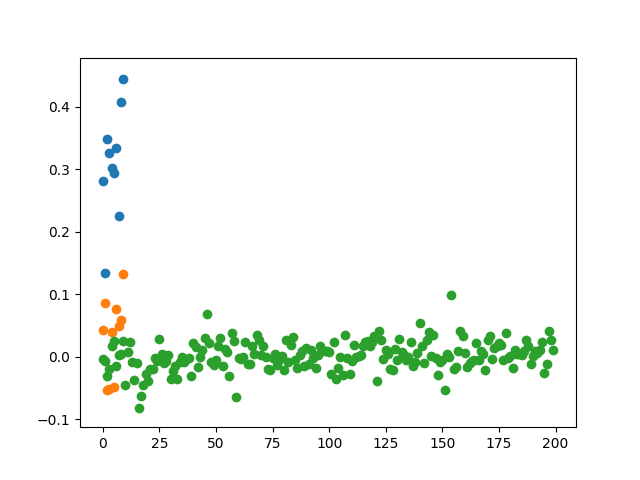

In [92]:
_,ax = plt.subplots()
m_a = np.array([m_.np_values()[0] for m_ in m])
m_a_noise = np.array([m_.np_values()[0] for m_ in m_noise])
m_a_mc = np.array([m_.np_values()[0] for m_ in m_mc])
ax.scatter(range(10),m_a, label='X drive')
ax.scatter(range(10),m_a_noise, label='X noise')
ax.scatter(range(200),m_a_mc)

### Trying again with newer method

In [7]:
fname = '/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(200,300)]
bdf_mc200 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinni

<IPython.core.display.Javascript object>


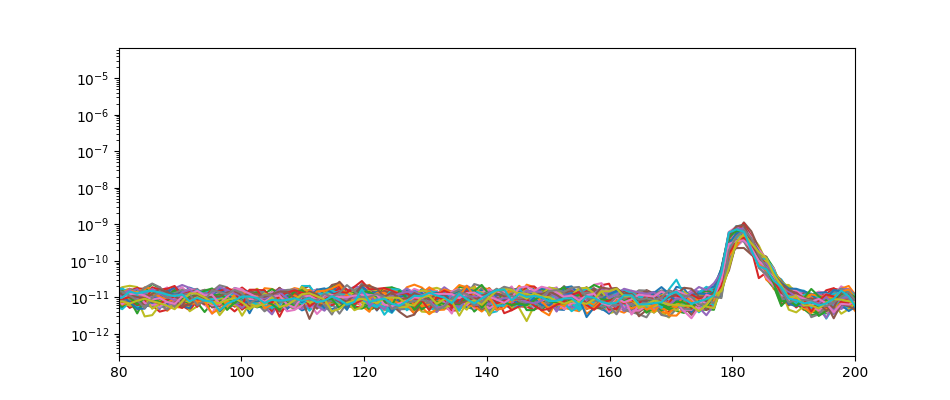

[(80, 200)]

In [110]:
bbb = bdf_mc200[0]
_,ax = plt.subplots(figsize=(9.5,4))
_ = [ax.semilogy(*bdf_.welch_psd('x')) for bdf_ in bdf_mc200]
ax.set(xlim=(80,200))

In [121]:
bbb = bdf_mc200[0]
fft = np.fft.rfft(bbb.x2, norm='ortho')
freq = np.fft.rfftfreq(len(bbb.x2), 1/5000.)

In [122]:
bins4sigma = fft[(freq>80)*(freq<130)]
